# ___

# [ Machine Learning in Earth Observation and Geography ]

</br>


<div>
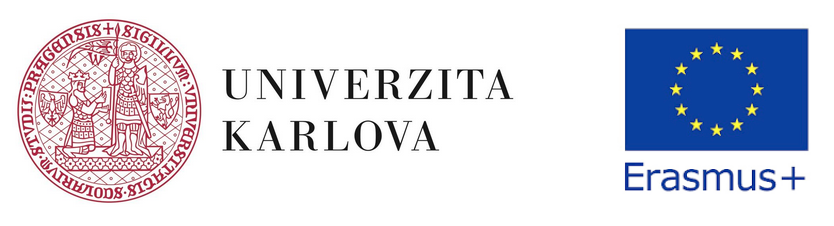
</div>

---

Lecturer: *Lukas Brodsky lukas.brodsky@natur.cuni.cz*

**Department of Applied Geoinformatics and Carthography, Charles University** 

___

## Polynomial model generalization exercises

Tasks: 

1. Evaluate infulence of the training data size on model generalization. 

2. Evaluate infulence of data noise on the model generalization. 

3. Generalize the polynomial model by simplification from high degree (top-down approach).


In [1]:
# Libraries 
import numpy as np
np.random.seed(0)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Plotting 
import matplotlib.pyplot as plt
%matplotlib inline

### Sample data

In [2]:
# Generate data 
def fun(x, noise):
    """Underlying function"""
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

# Generate training & testing data
def train_test_data(n_samples, noise_factor): 
    """Function to generate training and testing sets"""
    
    # train 
    np.random.seed(0)
    X_train = np.sort(np.random.rand(n_samples))
    noise_train = np.random.rand(n_samples) * noise_factor
    y_train = fun(X_train, noise_train) 
    X_train = X_train.reshape(-1, 1)
    
    # test 
    X_test = np.sort(np.random.rand(n_samples))
    noise_test = np.random.rand(n_samples) * noise_factor
    y_test = fun(X_test, noise_test)
    X_test = X_test.reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test

In [3]:
# prepare data 
n_samples = 10
noise_factor = 0.9

X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [4]:
# Underlaying function
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

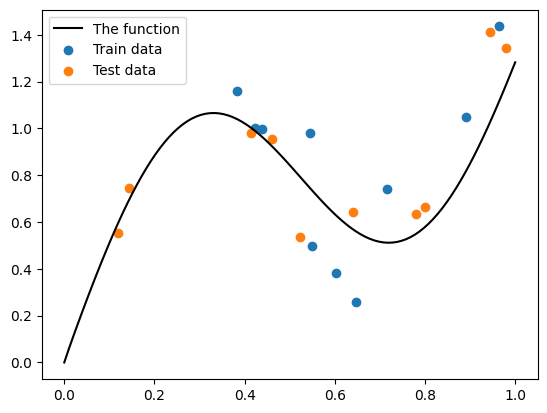

In [11]:
# Plot the data and underlaying function 
plt.plot(X_fun, y_fun, color='k', label='The function')
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.legend() 

In [12]:
# Fit polynomial model (degree = 10)
# Transform input data to polynomials
degree = 10
# instantiate
poly = PolynomialFeatures(degree=degree, include_bias=False)
# fit_transform
polynomial_features = poly.fit_transform(X_train)

model = LinearRegression()
# fit the model 
model.fit(polynomial_features, y_train) 

LinearRegression()

In [14]:
# Evaluate the model - training error 
# Evaluate: predict (use the polynomial transform data!) for model evaluation
y_poly_pred = model.predict(polynomial_features)
MSE_poly_train = mean_squared_error(y_train, y_poly_pred)
print(f'MSE polynomial 10 training: {round(MSE_poly_train, 6)}')

MSE polynomial 10 training: 0.0


In [15]:
# Test error 
# Evaluate the model on test subset
X_test_poly_fetures = poly.fit_transform(X_test)
y_poly_test_pred = model.predict(X_test_poly_fetures) 
MSE_poly_test = mean_squared_error(y_test, y_poly_test_pred)
print(f'MSE polynomial 10 testing: {round(MSE_poly_test, 5)}')

MSE polynomial 10 testing: 13867580748.79138


In [ ]:
# How well is the model generlized? 

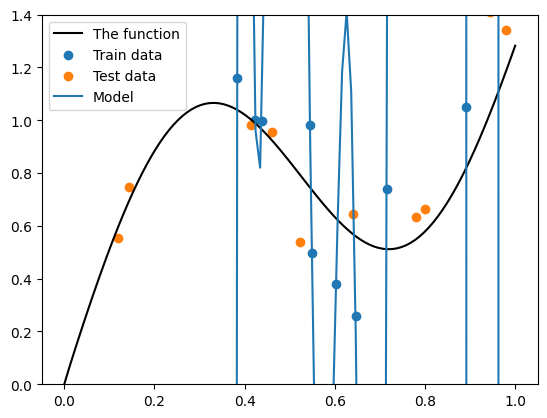

In [19]:
# Plot the model with the data? 
plt.plot(X_fun, y_fun, color='k', label='The function')
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.ylim(0, 1.4)
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = model.predict(plot_polynomial_features)
plt.plot(X_plot, y_plot, label='Model')

plt.legend() 

### **Exercise 1:** Evaluate the infulence of the data size on model generalization
* Increse the parameter `n_samples` from 10 to 50, 100, 200, and 500
* What is the effect of training data size on its model performance while using model of higher degree than needed? 
* How importan is to have enough samples? 

In [32]:
# set size of the samples
# train model 
# evaluate model  
noise_factor = 0.9
degree = 10
n_samples = 500 # update 

X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [33]:
degree = 10
# instantiate
poly = PolynomialFeatures(degree=degree, include_bias=False)
# fit_transform
polynomial_features = poly.fit_transform(X_train)

model = LinearRegression()
# fit the model 
model.fit(polynomial_features, y_train) 

LinearRegression()

In [34]:
# Evaluate the model - training error 
# Evaluate: predict (use the polynomial transform data!) for model evaluation
y_poly_pred = model.predict(polynomial_features)
MSE_poly_train = mean_squared_error(y_train, y_poly_pred)
print(f'MSE polynomial 10 training: {round(MSE_poly_train, 6)}')

MSE polynomial 10 training: 0.025065


In [35]:
# Test error 
# Evaluate the model on test subset
X_test_poly_fetures = poly.fit_transform(X_test)
y_poly_test_pred = model.predict(X_test_poly_fetures) 
MSE_poly_test = mean_squared_error(y_test, y_poly_test_pred)
print(f'MSE polynomial 10 testing: {round(MSE_poly_test, 5)}')

MSE polynomial 10 testing: 0.02896


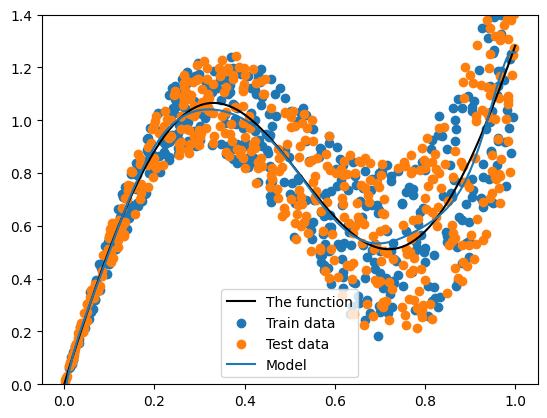

In [36]:
# Plot the model
# Plot the model with the data? 
plt.plot(X_fun, y_fun, color='k', label='The function')
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.ylim(0, 1.4)
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = model.predict(plot_polynomial_features)
plt.plot(X_plot, y_plot, label='Model')

plt.legend() 

In [ ]:
# What is the effect of incresing sample size on model generalization? 
# Is there any use of the polynomial model for this use case?

### **Exercise 2:** Evaluate the infulence of noise on the model generalization
* Decrese the noise parameter `noise_factor` from 0.9 to 0.5, and 0.1
* What is the effect of noise in the training data on model generalization? 
* Next, increase  the parameter `n_samples` from to 200 and keep `noise_factor` at 10% = 0.1. How does the model look?  

In [47]:
noise_factor = 0.1
degree = 10
n_samples = 20 

# run the model 
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [48]:
degree = 10
# instantiate
poly = PolynomialFeatures(degree=degree, include_bias=False)
# fit_transform
polynomial_features = poly.fit_transform(X_train)

model = LinearRegression()
# fit the model 
model.fit(polynomial_features, y_train) 

LinearRegression()

In [49]:
# Evaluate the model - training error 
# Evaluate: predict (use the polynomial transform data!) for model evaluation
y_poly_pred = model.predict(polynomial_features)
MSE_poly_train = mean_squared_error(y_train, y_poly_pred)
print(f'MSE polynomial 10 training: {round(MSE_poly_train, 6)}')

MSE polynomial 10 training: 0.000187


In [50]:
# Test error 
# Evaluate the model on test subset
X_test_poly_fetures = poly.fit_transform(X_test)
y_poly_test_pred = model.predict(X_test_poly_fetures) 
MSE_poly_test = mean_squared_error(y_test, y_poly_test_pred)
print(f'MSE polynomial 10 testing: {round(MSE_poly_test, 5)}')

MSE polynomial 10 testing: 0.00127


In [52]:
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

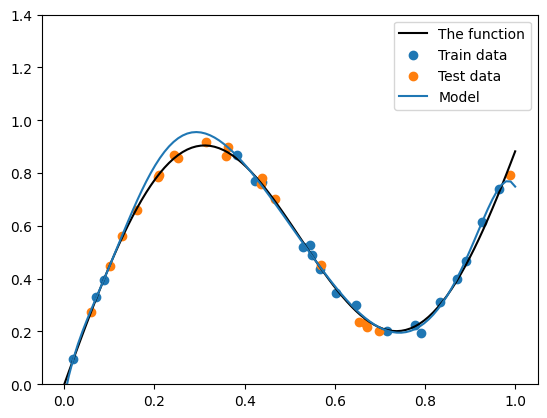

In [53]:
# Plot the model
# Plot the model
# Plot the model with the data? 
plt.plot(X_fun, y_fun, color='k', label='The function')
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.ylim(0, 1.4)
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = model.predict(plot_polynomial_features)
plt.plot(X_plot, y_plot, label='Model')

plt.legend() 

In [ ]:
# Evaluate the results 

### **Exercise 3:** Simplify the model for better generalization
* Decrese the degree of polynomial of model`deg` from 10 to reasonable number, so the difference between testing and training model is minimized. 


In [67]:
noise_factor = 0.5
degree = 2
n_samples = 30 
# run the model 
X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [68]:

# instantiate
poly = PolynomialFeatures(degree=degree, include_bias=False)
# fit_transform
polynomial_features = poly.fit_transform(X_train)

model = LinearRegression()
# fit the model 
model.fit(polynomial_features, y_train) 

LinearRegression()

In [69]:
# Evaluate the model - training error 
# Evaluate: predict (use the polynomial transform data!) for model evaluation
y_poly_pred = model.predict(polynomial_features)
MSE_poly_train = mean_squared_error(y_train, y_poly_pred)
print(f'MSE polynomial 10 training: {round(MSE_poly_train, 6)}')

MSE polynomial 10 training: 0.054082


In [70]:
# Test error 
# Evaluate the model on test subset
X_test_poly_fetures = poly.fit_transform(X_test)
y_poly_test_pred = model.predict(X_test_poly_fetures) 
MSE_poly_test = mean_squared_error(y_test, y_poly_test_pred)
print(f'MSE polynomial 10 testing: {round(MSE_poly_test, 5)}')

MSE polynomial 10 testing: 0.07058


In [71]:
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

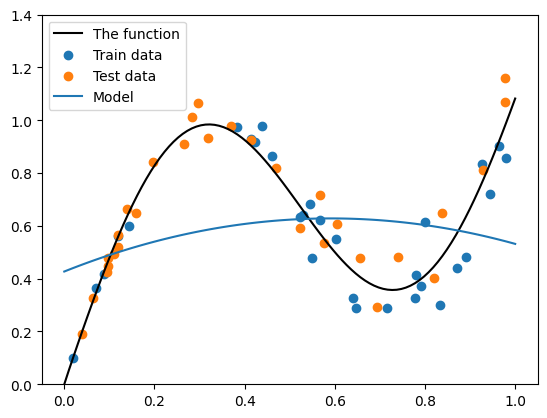

In [72]:
# Plot the model
plt.plot(X_fun, y_fun, color='k', label='The function')
plt.scatter(X_train, y_train, label='Train data')
plt.scatter(X_test, y_test, label='Test data')
plt.ylim(0, 1.4)
X_plot = np.linspace(0, 1, 100)
plot_polynomial_features = poly.fit_transform(X_plot.reshape(-1, 1))
y_plot = model.predict(plot_polynomial_features)
plt.plot(X_plot, y_plot, label='Model')

plt.legend() 

In [ ]:
# Evaluate the results